# THE SPARKS FOUNDATION

# Data Science & Business Analytics Internship GRIP Feb 2021

# Author : Udita Goswami

# TASK 5 : Exploratory Data Analysis - Sports

In [ ]:
Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’ 
As a sports analysts, find out the most successful teams, players and factors 
contributing win or loss of a team. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
file1 = pd.read_csv('deliveries.csv') ## here we have the data set of the team players
file2 = pd.read_csv('matches.csv') ## its includes the data set of the Matches and where they played

In [3]:
file1.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [4]:
file2.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

In [5]:
## Cleaning of data
file2.venue.value_counts()

Eden Gardens                                            77
M Chinnaswamy Stadium                                   73
Wankhede Stadium                                        73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
SuperSport Park                                         12
Sardar Patel Stadium, Motera                            12
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       

In [6]:
## Cleaning of the data
file2.team1.replace({'Rising Pune Supergiants': 'Rising Pune Supergaint'},regex=True,inplace= True)
file2.team2.replace({'Rising Pune Supergiants': 'Rising Pune Supergaint'},regex=True,inplace= True)
file2.winner.replace({'Rising Pune Supergiants': 'Rising Pune Supergaint'},regex=True,inplace= True)
file2.venue.replace({'Feroz Shah Kotla Ground':'Feroz Shah Kotla',
                    'M Chinnaswamy Stadium':'M. Chinnaswamy Stadium',
                    'M. A. Chidambaram Stadium':'M.A. Chidambaram Stadium',
                    'MA Chidambaram Stadium, Chepauk':'M.A. Chidambaram Stadium',
                    'Punjab Cricket Association IS Bindra Stadium, Mohali':'Punjab Cricket Association Stadium',
                    'Punjab Cricket Association Stadium, Mohali':'Punjab Cricket Association Stadium',
                    'IS Bindra Stadium':'Punjab Cricket Association Stadium',
                    'Rajiv Gandhi International Stadium, Uppal':'Rajiv Gandhi International Stadium',
                    'Rajiv Gandhi Intl. Cricket Stadium':'Rajiv Gandhi International Stadium'},regex=True,inplace=True)

In [7]:
file2.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

Top 20 cities with maximum number of Matches Played:               city  Match Counts
23         Mumbai           101
21        Kolkata            77
10          Delhi            74
2       Bangalore            66
14      Hyderabad            64
8         Chennai            57
16         Jaipur            47
7      Chandigarh            46
26           Pune            38
12         Durban            15
3       Bengaluru            14
31  Visakhapatnam            13
1       Ahmedabad            12
6       Centurion            12
22         Mohali            10
28         Rajkot            10
11     Dharamsala             9
15         Indore             9
17   Johannesburg             8
5       Cape Town             7


Text(0.5, 1.0, 'Top Cites that have hosted IPL Matches')

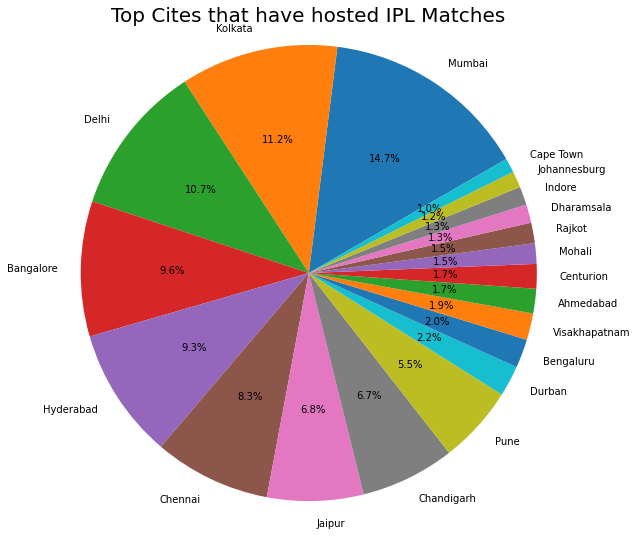

In [8]:
## Top 20 cities which hosted the IPL matches

city_count = file2.groupby('city').apply(lambda x:x['city'].count()).reset_index(name ='Match Counts')
top_cities_order = city_count.sort_values(by ='Match Counts', ascending= False)
top_cities = top_cities_order[:20]
print('Top 20 cities with maximum number of Matches Played: ', top_cities)

plt.figure(figsize=(9,9))
plt.pie(top_cities['Match Counts'], labels =top_cities['city'], autopct='%1.1f%%', startangle=30)
plt.axis('equal')
plt.title('Top Cites that have hosted IPL Matches', size =20)

 Top 20 Statdium with The maximum number of Matches Played:                                                  venue  Match Counts
15                             M. Chinnaswamy Stadium            80
8                                        Eden Gardens            77
9                                    Feroz Shah Kotla            74
34                                   Wankhede Stadium            73
23                 Rajiv Gandhi International Stadium            64
16                           M.A. Chidambaram Stadium            57
22                 Punjab Cricket Association Stadium            56
26                             Sawai Mansingh Stadium            47
17            Maharashtra Cricket Association Stadium            21
5                          Dr DY Patil Sports Academy            17
31                         Subrata Roy Sahara Stadium            17
14                                          Kingsmead            15
32                                    SuperSport Park  

Text(0.5, 1.0, 'Top Stadium that have hosted IPL Matches')

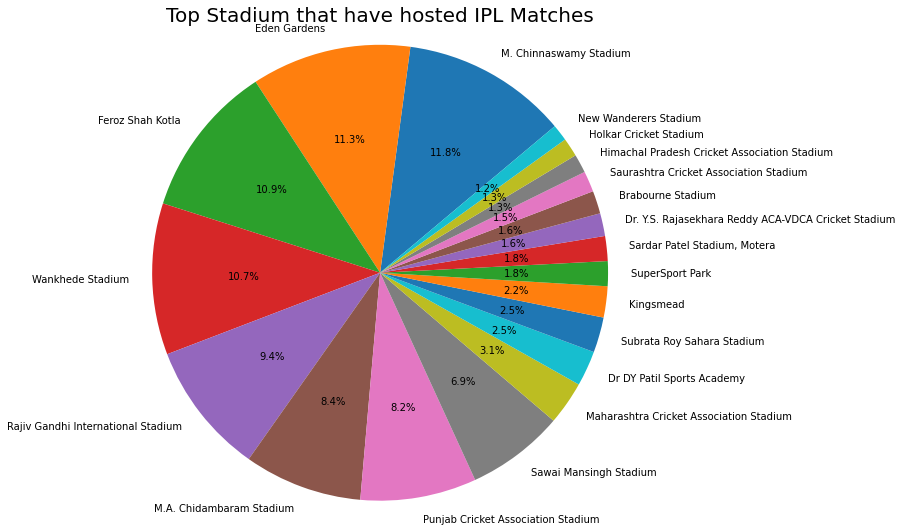

In [9]:
## Top 20 Stadium that hosted the IPL Matched

venue_counts = file2.groupby('venue').apply(lambda x:x['venue'].count()).reset_index(name ='Match Counts')
top_venue_order = venue_counts.sort_values(by='Match Counts',ascending =False)
top_venue = top_venue_order[:20]
print(' Top 20 Stadium with The maximum number of Matches Played: ', top_venue)

plt.figure(figsize=(9,9))
plt.pie(top_venue['Match Counts'], labels = top_venue['venue'],autopct='%1.1f%%', startangle=40)
plt.axis('equal')
plt.title('Top Stadium that have hosted IPL Matches', size =20)


In [12]:
# Top 10 Batsmen in IPL Season 2008-2019
batting_tot = file1.groupby('batsman').apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Runs')
batting_soreted = batting_tot.sort_values(by='Runs',ascending=False)
top_batsman = batting_soreted[:10]
print('The Top 10 Batsman in the Tournament are: ', top_batsman)

fig = px.bar(top_batsman, x='batsman', y= 'Runs', hover_data=['batsman'],
            color ='Runs',title ='Top 10 Batsmen in IPL - seasons 2008-2019')
fig.show()

The Top 10 Batsman in the Tournament are:              batsman  Runs
486         V Kohli  5434
428        SK Raina  5415
367       RG Sharma  4914
112       DA Warner  4741
392        S Dhawan  4632
92         CH Gayle  4560
290        MS Dhoni  4477
384      RV Uthappa  4446
26   AB de Villiers  4428
147       G Gambhir  4223


- Here we take the best batsmen on the basis of the run they score

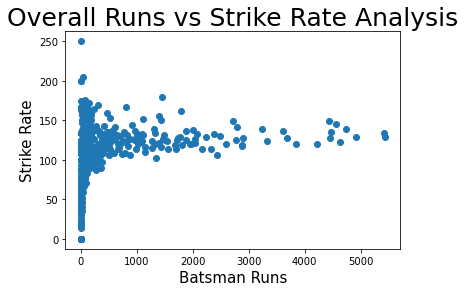

In [16]:
## Overall Run Rate and Strike rate

Target_run=1000
batting_tot = file1.groupby('batsman').apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Runs')
batsman_balls_faced = file1.groupby('batsman').count()
batsman_balls_faced_count = batsman_balls_faced['ball'].reset_index(name='Balls Faced')
batsman_runs_balls = pd.merge(batting_tot,batsman_balls_faced_count,left_on='batsman',right_on='batsman',how='outer')
batsman_strike_rate = batsman_runs_balls.groupby(['batsman','Runs']).apply(lambda x:((x['Runs'])/(x['Balls Faced']))*100).reset_index(name='Strike Rate')

plt.scatter(batsman_strike_rate['Runs'],batsman_strike_rate['Strike Rate'])
plt.plot(np.mean(batsman_strike_rate['Strike Rate']),'r')
plt.xlabel('Batsman Runs',size=15)
plt.ylabel('Strike Rate',size=15)
plt.title('Overall Runs vs Strike Rate Analysis',size=25)
plt.show()


- Batting strike rate (s/r) is defined for a batsman as the average number of runs scored per 100 balls faced. The higher the strike rate, the more effective a batsman is at scoring quickly. In Test cricket, a batsman's strike rate is of secondary relevance to his ability to score runs without getting out.

The Top 10 batsmen having highest strike rate, scoring atleast 1000 Runs:
             batsman  Runs  Strike Rate
34       AD Russell  1445   179.950187
374         RR Pant  1792   162.318841
153      GJ Maxwell  1403   155.543237
163       HH Pandya  1118   151.902174
189      JC Buttler  1431   150.000000
488        V Sehwag  2728   148.827059
26   AB de Villiers  4428   148.740343
92         CH Gayle  4560   145.640370
213      KA Pollard  2784   141.751527
112       DA Warner  4741   139.523249


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

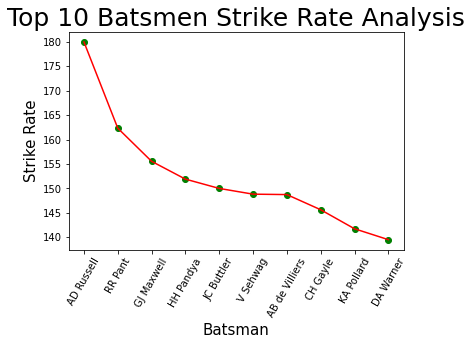

In [17]:
# top 10 Batsmen strike Rate analysis
batsman_strike_rate_list = batsman_strike_rate.sort_values(by='Strike Rate',ascending=False)
batsman_strike_rate_above_target_runs = batsman_strike_rate_list[batsman_strike_rate_list['Runs']>=Target_run]
top_strike_rate_batsman =  batsman_strike_rate_above_target_runs.loc[:,['batsman','Runs','Strike Rate']][0:10]
print('The Top 10 batsmen having highest strike rate, scoring atleast {} Runs:\n'.format(Target_run),top_strike_rate_batsman)

plt.plot(top_strike_rate_batsman['batsman'],top_strike_rate_batsman['Strike Rate'],color='r')
plt.scatter(top_strike_rate_batsman['batsman'],top_strike_rate_batsman['Strike Rate'],color='g')
plt.xlabel('Batsman',size=15)
plt.ylabel('Strike Rate',size=15)
plt.title('Top 10 Batsmen Strike Rate Analysis',size=25)
plt.xticks(rotation=60)

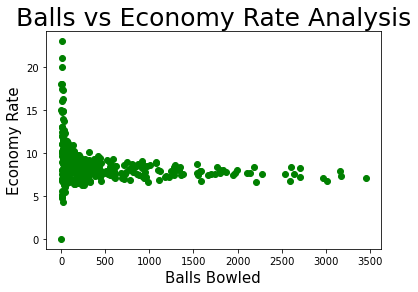

In [19]:
# Balls vs Economy Rate 
Ball_Limit=1000
bowling_runs = file1.groupby('bowler').apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Runs Conceeded')
bowling_balls = file1.groupby('bowler').count()
bowled_balls = bowling_balls['ball'].reset_index(name='Balls Bowled')
bowler_stats = pd.merge(bowling_runs,bowled_balls,left_on='bowler',right_on='bowler',how='outer')
bowler_economy_rate = bowler_stats.groupby(['bowler','Balls Bowled']).apply(lambda x:(((x['Runs Conceeded'])/(x['Balls Bowled']))*6)).reset_index(name='Economy Rate')

plt.scatter(bowler_economy_rate['Balls Bowled'],bowler_economy_rate['Economy Rate'],color='g')
plt.xlabel('Balls Bowled',size=15)
plt.ylabel('Economy Rate',size=15)
plt.title('Balls vs Economy Rate Analysis',size=25)
plt.show()

- In cricket, a player's economy rate is the average number of runs they have conceded per over bowled. In most circumstances, the lower the economy rate is, the better the bowler is performing.

The Top 10 bowlers having best economy rate, bowling atleast 1000 balls:
               bowler  Balls Bowled  Economy Rate
108         DW Steyn          2207      6.671500
207   M Muralitharan          1581      6.698292
269         R Ashwin          3016      6.746021
347        SP Narine          2600      6.782308
301      Rashid Khan          1106      6.819168
126  Harbhajan Singh          3451      7.041437
340       SL Malinga          2974      7.083389
339         SK Warne          1223      7.187244
202         M Kartik          1182      7.197970
53           B Kumar          2707      7.234577


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

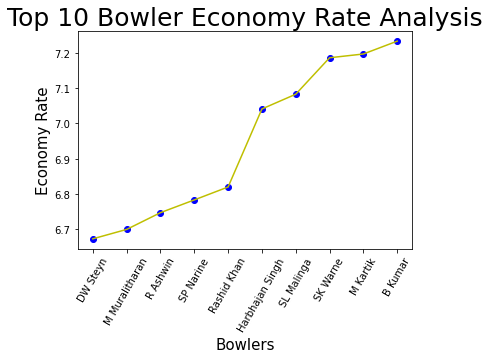

In [20]:
# Top 10 Bowlers economy Rate
bowler_best_economy_rate=bowler_economy_rate.sort_values(by='Economy Rate',ascending=True)
bowler_best_economy_rate_condition=bowler_best_economy_rate[bowler_best_economy_rate['Balls Bowled']>=Ball_Limit]
top_10_economy=bowler_best_economy_rate_condition.loc[:,['bowler','Balls Bowled','Economy Rate']][0:10]
print('The Top 10 bowlers having best economy rate, bowling atleast {} balls:\n'.format(Ball_Limit),top_10_economy)

plt.plot(top_10_economy['bowler'],top_10_economy['Economy Rate'],color='y')
plt.scatter(top_10_economy['bowler'],top_10_economy['Economy Rate'],color='b')
plt.xlabel('Bowlers',size=15)
plt.ylabel('Economy Rate',size=15)
plt.title('Top 10 Bowler Economy Rate Analysis',size=25)
plt.xticks(rotation=60)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text major ticklabel objects>)

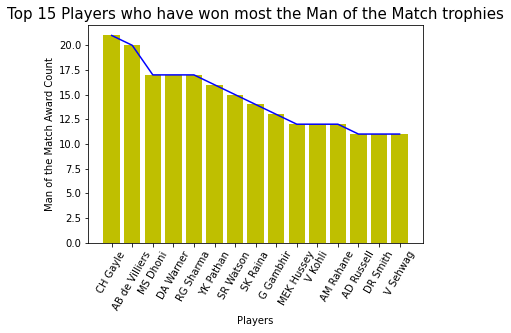

In [21]:
# Top 15 players who won the Man of the Match Trohies
motm = file2.groupby('player_of_match').apply(lambda x:x['player_of_match'].count()).reset_index(name='Man of the Match Awards')
motm_sort = motm.sort_values(by='Man of the Match Awards',ascending=False)
motm_top = motm_sort[0:15]

plt.plot(motm_top['player_of_match'],motm_top['Man of the Match Awards'],color='b')
plt.bar(motm_top['player_of_match'],motm_top['Man of the Match Awards'],color='y')
plt.xlabel('Players')
plt.ylabel('Man of the Match Award Count')
plt.title('Top 15 Players who have won most the Man of the Match trophies',size=15)
plt.xticks(rotation=60)

- In team sports, a player of the match or man of the match award is often given to the outstanding player in a particular match. 

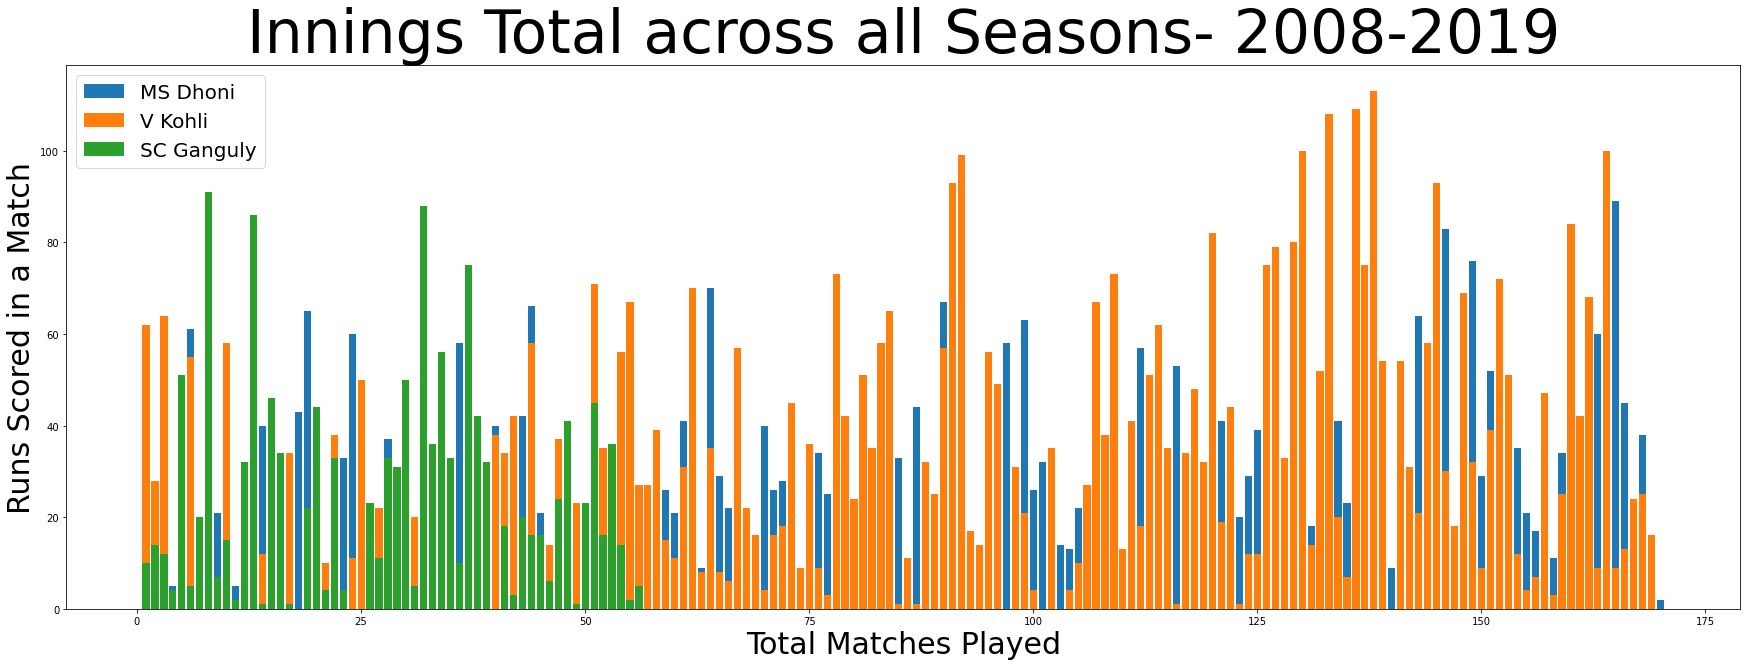

In [25]:
# Total inning of 'MS Dhoni','V Kohli','SC Ganguly' for seasons 2008-2019
batsman_list_req=['MS Dhoni','V Kohli','SC Ganguly']
batsman = file1[file1.batsman.isin(batsman_list_req)]
batsman_run = batsman.groupby(['match_id','batsman']).apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Runs')

#bat_list=batsman.batsman.unique()
plt.figure(figsize=(30,10))
for name in batsman_list_req:
    batsman_check = batsman_run[batsman_run.batsman==name]
    batsman_check.index = np.arange(1, len(batsman_check) + 1)
    x = batsman_check.index
    y = batsman_check.Runs
    plt.bar(x,y)
plt.legend(batsman_list_req,prop={'size':20})
plt.title("Innings Total across all Seasons- 2008-2019",fontsize=60)
plt.xlabel("Total Matches Played",fontsize=30)
plt.ylabel("Runs Scored in a Match",fontsize=30)
plt.show()

Text(0.5, 1.0, 'Team wise Batting Average in IPL- Seasons 2008-2019')

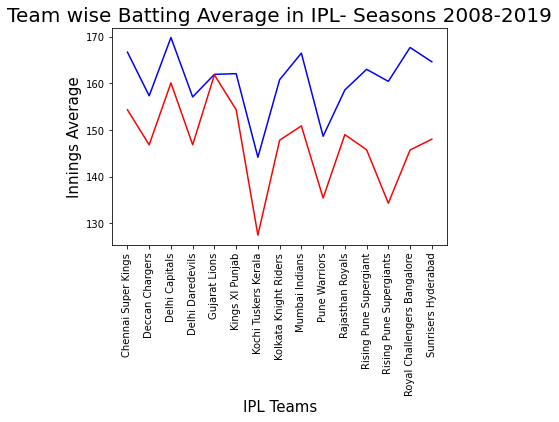

In [26]:
# Team wise Batting Avergae in IPL - season 2008-2019
first_innins_run = file1[file1['inning']==1]
team_innings_run = first_innins_run.groupby(['batting_team','match_id']).apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Innings Total')
team_innings_avg = team_innings_run.groupby('batting_team').apply(lambda x:np.mean(x['Innings Total'])).reset_index(name='Innings Average')
plt.plot(team_innings_avg['batting_team'],team_innings_avg['Innings Average'],'b')

second_innins_run = file1[file1['inning']==2]
team_innings_run = second_innins_run.groupby(['batting_team','match_id']).apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Innings Total')
team_innings_avg = team_innings_run.groupby('batting_team').apply(lambda x:np.mean(x['Innings Total'])).reset_index(name='Innings Average')

plt.plot(team_innings_avg['batting_team'],team_innings_avg['Innings Average'],'r')
plt.xticks(rotation=90)
plt.xlabel('IPL Teams',size=15)
plt.ylabel('Innings Average',size=15)
plt.title('Team wise Batting Average in IPL- Seasons 2008-2019',size=20)

Text(23.999999999999986, 0.5, 'Match')

<Figure size 432x288 with 0 Axes>

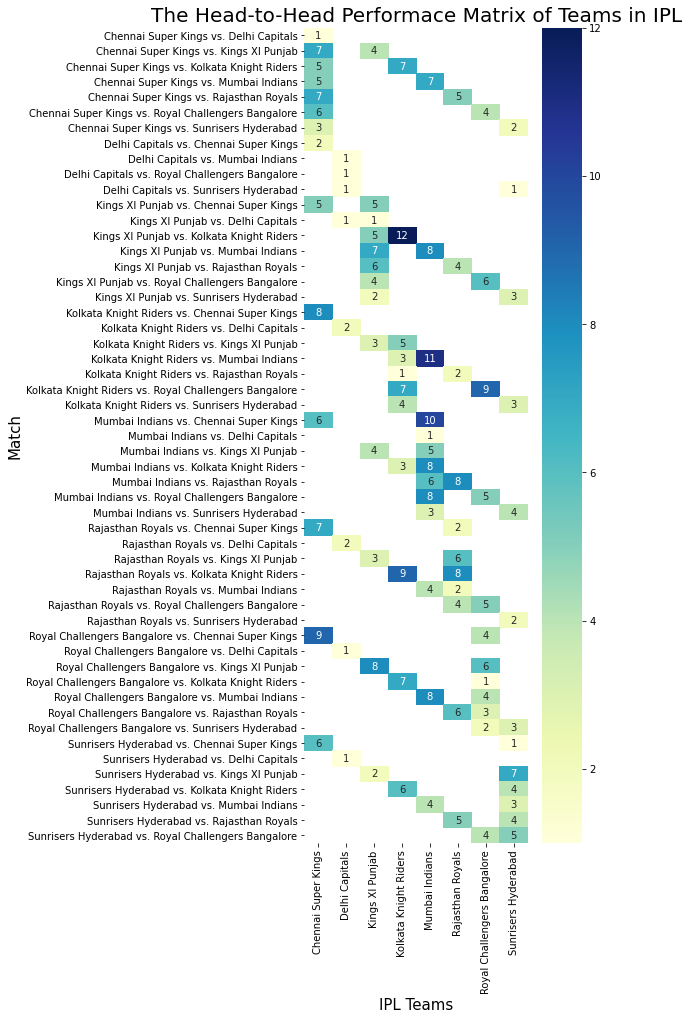

In [28]:
Current_teams = ['Chennai Super Kings','Mumbai Indians','Rajasthan Royals','Delhi Capitals','Sunrisers Hyderabad','Kolkata Knight Riders','Royal Challengers Bangalore','Kings XI Punjab']

team_1_filter = file2[file2.team1.isin(Current_teams)]
team_2_filter = team_1_filter[team_1_filter.team2.isin(Current_teams)]

teams_filter = team_2_filter[team_2_filter.winner.isin(Current_teams)]
head_to_head_matches = teams_filter.groupby(['team1','team2','winner']).apply(lambda x:x['winner'].count()).reset_index(name='Winning Counts')
head_to_head_matches['Game'] = head_to_head_matches['team1']+' vs. '+head_to_head_matches['team2']
head_to_head_matches.loc[:,['Game','winner','Winning Counts']]

heatmap1_data = pd.pivot_table(head_to_head_matches, values='Winning Counts', index=['Game'], columns='winner')
fig = plt.figure()
fig, ax = plt.subplots(1,1, figsize=(5,15))
g = sns.heatmap(heatmap1_data,annot=True, cmap="YlGnBu",fmt='g')
ax.set_title('The Head-to-Head Performace Matrix of Teams in IPL',size=20)
ax.set_xlabel('IPL Teams',size=15)
ax.set_ylabel('Match',size=15)



Text(0.5, 1.0, 'Team wise wins at the Venues')

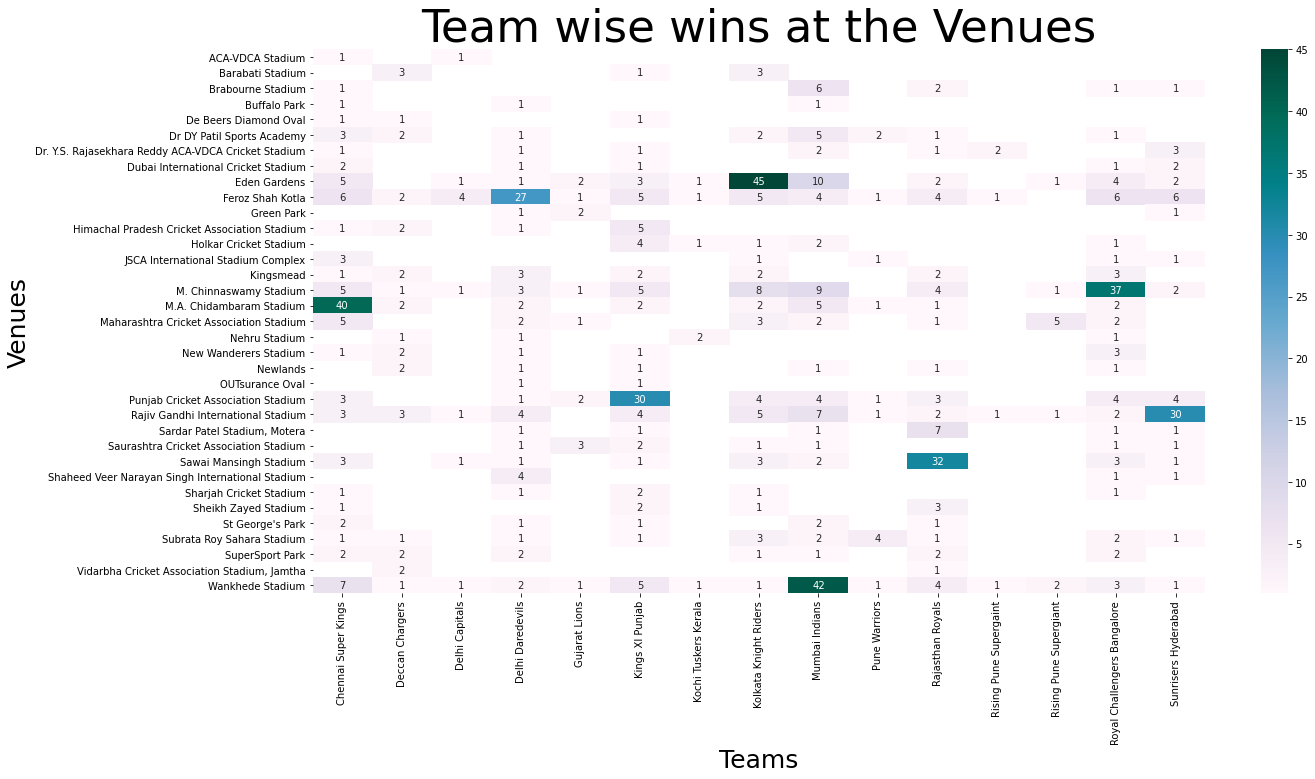

In [29]:
venue_win = file2.groupby(['venue','winner']).apply(lambda x:x['winner'].count()).reset_index(name='Match Wins')
venue_win_pvt = pd.pivot(venue_win,values='Match Wins',index='venue',columns='winner')
venue_win_pvt.replace(np.NaN,0)
plt.figure(figsize = (20,10))
htmp = sns.heatmap(venue_win_pvt,annot=True,fmt='g',cmap='PuBuGn')
plt.xlabel('Teams',size=25)
plt.ylabel('Venues',size=25)
plt.title('Team wise wins at the Venues',size=45)

- here we can see that the team who played on their home ground will have more cahnge of winning the Match.

- But ignoring those, ie, when considering a teams capability to perform in the away matches, we see Mumbai Indians and Chennai Super Kings have shown very good performances in different venues, and that too multiple times. Undoubtedly, they have been the most succesful teams in the history of the tournament.




Text(0.5, 1.0, 'The Toss Decisions taken by Venue Heatmap-in IPL')

<Figure size 432x288 with 0 Axes>

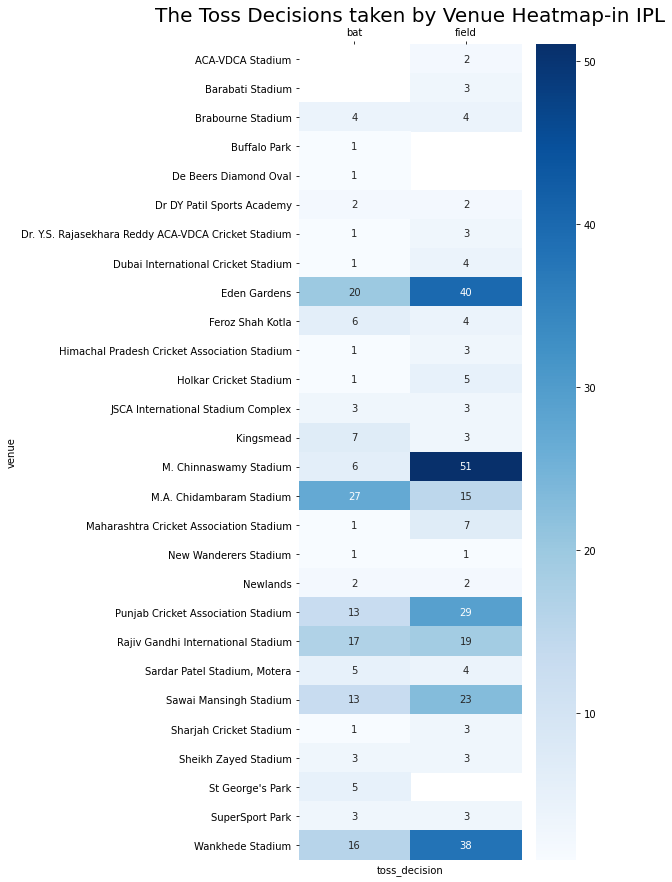

In [31]:
venue_toss = teams_filter.groupby(['venue','toss_decision']).apply(lambda x:x['toss_decision'].count()).reset_index(name='Toss Decision Counts')

heatmap2_data = pd.pivot_table(venue_toss, values='Toss Decision Counts', index=['venue'], columns='toss_decision')
fig = plt.figure()
fig, ax = plt.subplots(1,1, figsize=(5,15))
g = sns.heatmap(heatmap2_data,annot=True, cmap="Blues",fmt='g')
g.xaxis.set_ticks_position("top")
ax.set_title('The Toss Decisions taken by Venue Heatmap-in IPL',size=20)

- Here we can see those who winn the toss will chose of chasing the other team/ or we can say they first choose feilding 


In [32]:
venue_toss_result = teams_filter.groupby(['venue','toss_decision']).apply(lambda x:np.sum(np.where(x['toss_winner']==x['winner'],1,0))).reset_index(name='Toss Winner Wins Match')
merged_venue_data = pd.merge(venue_toss_result,venue_toss,how='inner',left_on=['venue','toss_decision'],right_on=['venue','toss_decision'])
merged_venue_data['Toss Winner Lose Match'] = merged_venue_data['Toss Decision Counts']-merged_venue_data['Toss Winner Wins Match']
merged_data_arranged = merged_venue_data.loc[:,['venue','toss_decision','Toss Decision Counts','Toss Winner Wins Match','Toss Winner Lose Match']]
merged_data_arranged

venue toss_decision  \
0                                    ACA-VDCA Stadium         field   
1                                    Barabati Stadium         field   
2                                   Brabourne Stadium           bat   
3                                   Brabourne Stadium         field   
4                                        Buffalo Park           bat   
5                               De Beers Diamond Oval           bat   
6                          Dr DY Patil Sports Academy           bat   
7                          Dr DY Patil Sports Academy         field   
8   Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...           bat   
9   Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...         field   
10                Dubai International Cricket Stadium           bat   
11                Dubai International Cricket Stadium         field   
12                                       Eden Gardens           bat   
13                                       Eden Gardens         field   
14                                   Feroz Shah Kotla           bat   
15                                   Feroz Shah Kotla         field   
16       Himachal Pradesh Cricket Association Stadium           bat   
17       Himachal Pradesh Cricket Association Stadium         field   
18                             Holkar Cricket Stadium           bat   
19                             Holkar Cricket Stadium         field   
20                 JSCA International Stadium Complex           bat   
21                 JSCA International Stadium Complex         field   
22                                          Kingsmead           bat   
23                                          Kingsmead         field   
24                             M. Chinnaswamy Stadium           bat   
25                             M. Chinnaswamy Stadium         field   
26                           M.A. Chidambaram Stadium           bat   
27                           M.A. Chidambaram Stadium         field   
28            Maharashtra Cricket Association Stadium           bat   
29            Maharashtra Cricket Association Stadium         field   
30                              New Wanderers Stadium           bat   
31                              New Wanderers Stadium         field   
32                                           Newlands           bat   
33                                           Newlands         field   
34                 Punjab Cricket Association Stadium           bat   
35                 Punjab Cricket Association Stadium         field   
36                 Rajiv Gandhi International Stadium           bat   
37                 Rajiv Gandhi International Stadium         field   
38                       Sardar Patel Stadium, Motera           bat   
39                       Sardar Patel Stadium, Motera         field   
40                             Sawai Mansingh Stadium           bat   
41                             Sawai Mansingh Stadium         field   
42                            Sharjah Cricket Stadium           bat   
43                            Sharjah Cricket Stadium         field   
44                               Sheikh Zayed Stadium           bat   
45                               Sheikh Zayed Stadium         field   
46                                   St George's Park           bat   
47                                    SuperSport Park           bat   
48                                    SuperSport Park         field   
49                                   Wankhede Stadium           bat   
50                                   Wankhede Stadium         field   

    Toss Decision Counts  Toss Winner Wins Match  Toss Winner Lose Match  
0                      2                       2                       0  
1                      3                       2                       1  
2                      4                       2                       2  
3                      4                       3       

- here we can see that those who won the toss preferablly they also will the match.

Text(50.999999999999986, 0.5, 'Stadium')

<Figure size 432x288 with 0 Axes>

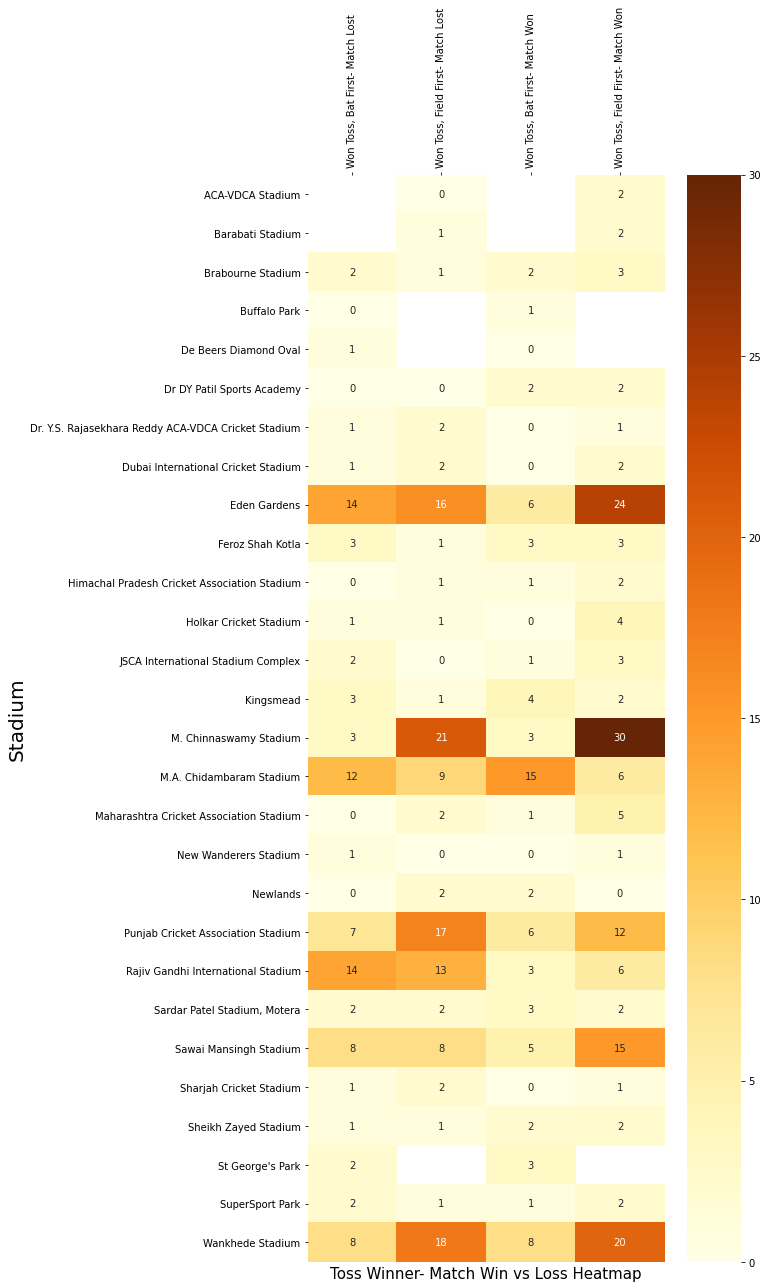

In [33]:
heatmap3_data = pd.pivot_table(merged_venue_data, values=['Toss Winner Wins Match','Toss Winner Lose Match'], 
                     index=['venue'], 
                     columns='toss_decision')
fig  = plt.figure()
fig,ax1 = plt.subplots(1,1,figsize=(8,20))
g = sns.heatmap(heatmap3_data,annot=True,cmap='YlOrBr',fmt='g')
g.xaxis.set_ticks_position("top")
g.set_xticklabels(['Won Toss, Bat First- Match Lost','Won Toss, Field First- Match Lost','Won Toss, Bat First- Match Won','Won Toss, Field First- Match Won'],rotation=90)
g.set_xlabel('Toss Winner- Match Win vs Loss Heatmap',size=15)
g.set_ylabel('Stadium',size=20)

- here we can generally, where the most of matches are 'Won Toss, Field First- Match Won' but there are also great chances where 'Won Toss, Field First- Match Lost'

### Observations 
- as we know Mumbai Indian won the maximum no. of matches and they n matches on Wankhede Stadium in Mumbai.
- The Batting and Bowling Averages of most of teams are better in the First innings-as compared to the second innings.
- the Best batsmen are the Virat Kohli , Suresh Raina, David Warner

## Thank You